<a href="https://colab.research.google.com/github/ayachiii/soturon/blob/main/PLI_Analysis_tetris%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#githubの接続を切りたいとき
%cd soturon
!git pull
%cd ..

/content/soturon
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 2 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (2/2), 895 bytes | 895.00 KiB/s, done.
From https://github.com/ayachiii/soturon
   eb36d92..4625501  main       -> origin/main
Updating eb36d92..4625501
Fast-forward
 PLI_5_miyake_overolad.csv => PLI_5_miyake_overload.csv | 0
 1 file changed, 0 insertions(+), 0 deletions(-)
 rename PLI_5_miyake_overolad.csv => PLI_5_miyake_overload.csv (100%)
/content


In [ ]:
!git clone https://github.com/ayachiii/soturon.git

fatal: destination path 'soturon' already exists and is not an empty directory.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import re

In [ ]:
# ここは手作業で設定
#subject_name_list = ["kumakura","kim","souma","fujii","tubota","toki","mori","hochi","yamada","takei"]
#phase_name_list = ["rest","practice","boredom","flow","ultra","overload"]

subject_name_list = ["ishida","yamamoto","ohashi","miyake","mitsuhashi","ko"]
phase_name_list = ["rest","boredom","flow","ultra","overload"]

In [ ]:
# 正規表現でなんとでもなる
# /Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/PLIdata
#pathes = glob.glob("/content/arai_MATLAB_program/csv/[0-5]_*/PLIdata/concentration_*.csv")
pathes = glob.glob("/content/soturon/PLI_*.csv")
pathes = sorted(pathes)
pathes

['/content/soturon/PLI_0_ishida_rest.csv',
 '/content/soturon/PLI_0_ko_rest.csv',
 '/content/soturon/PLI_0_mitsuhashi_rest.csv',
 '/content/soturon/PLI_0_miyake_rest.csv',
 '/content/soturon/PLI_0_ohashi_rest.csv',
 '/content/soturon/PLI_0_yamamoto_rest.csv',
 '/content/soturon/PLI_2_ishida_boredom.csv',
 '/content/soturon/PLI_2_ko_boredom.csv',
 '/content/soturon/PLI_2_mitsuhashi_boredom.csv',
 '/content/soturon/PLI_2_miyake_boredom.csv',
 '/content/soturon/PLI_2_ohashi_boredom.csv',
 '/content/soturon/PLI_2_yamamoto_boredom.csv',
 '/content/soturon/PLI_3_ishida_flow.csv',
 '/content/soturon/PLI_3_ko_flow.csv',
 '/content/soturon/PLI_3_mitsuhashi_flow.csv',
 '/content/soturon/PLI_3_miyake_flow.csv',
 '/content/soturon/PLI_3_ohashi_flow.csv',
 '/content/soturon/PLI_3_yamamoto_flow.csv',
 '/content/soturon/PLI_4_ishida_flow_ultra.csv',
 '/content/soturon/PLI_4_ko_flow_ultra.csv',
 '/content/soturon/PLI_4_mitsuhashi_flow_ultra.csv',
 '/content/soturon/PLI_4_miyake_flow_ultra.csv',
 '/con

In [ ]:
df = pd.read_csv(f"{pathes[0]}")

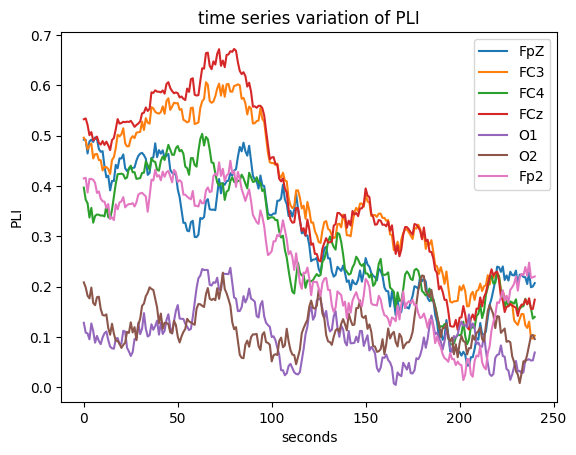

In [ ]:
df.plot()
plt.title("time series variation of PLI")
plt.xlabel("seconds")
plt.ylabel("PLI")
plt.legend()


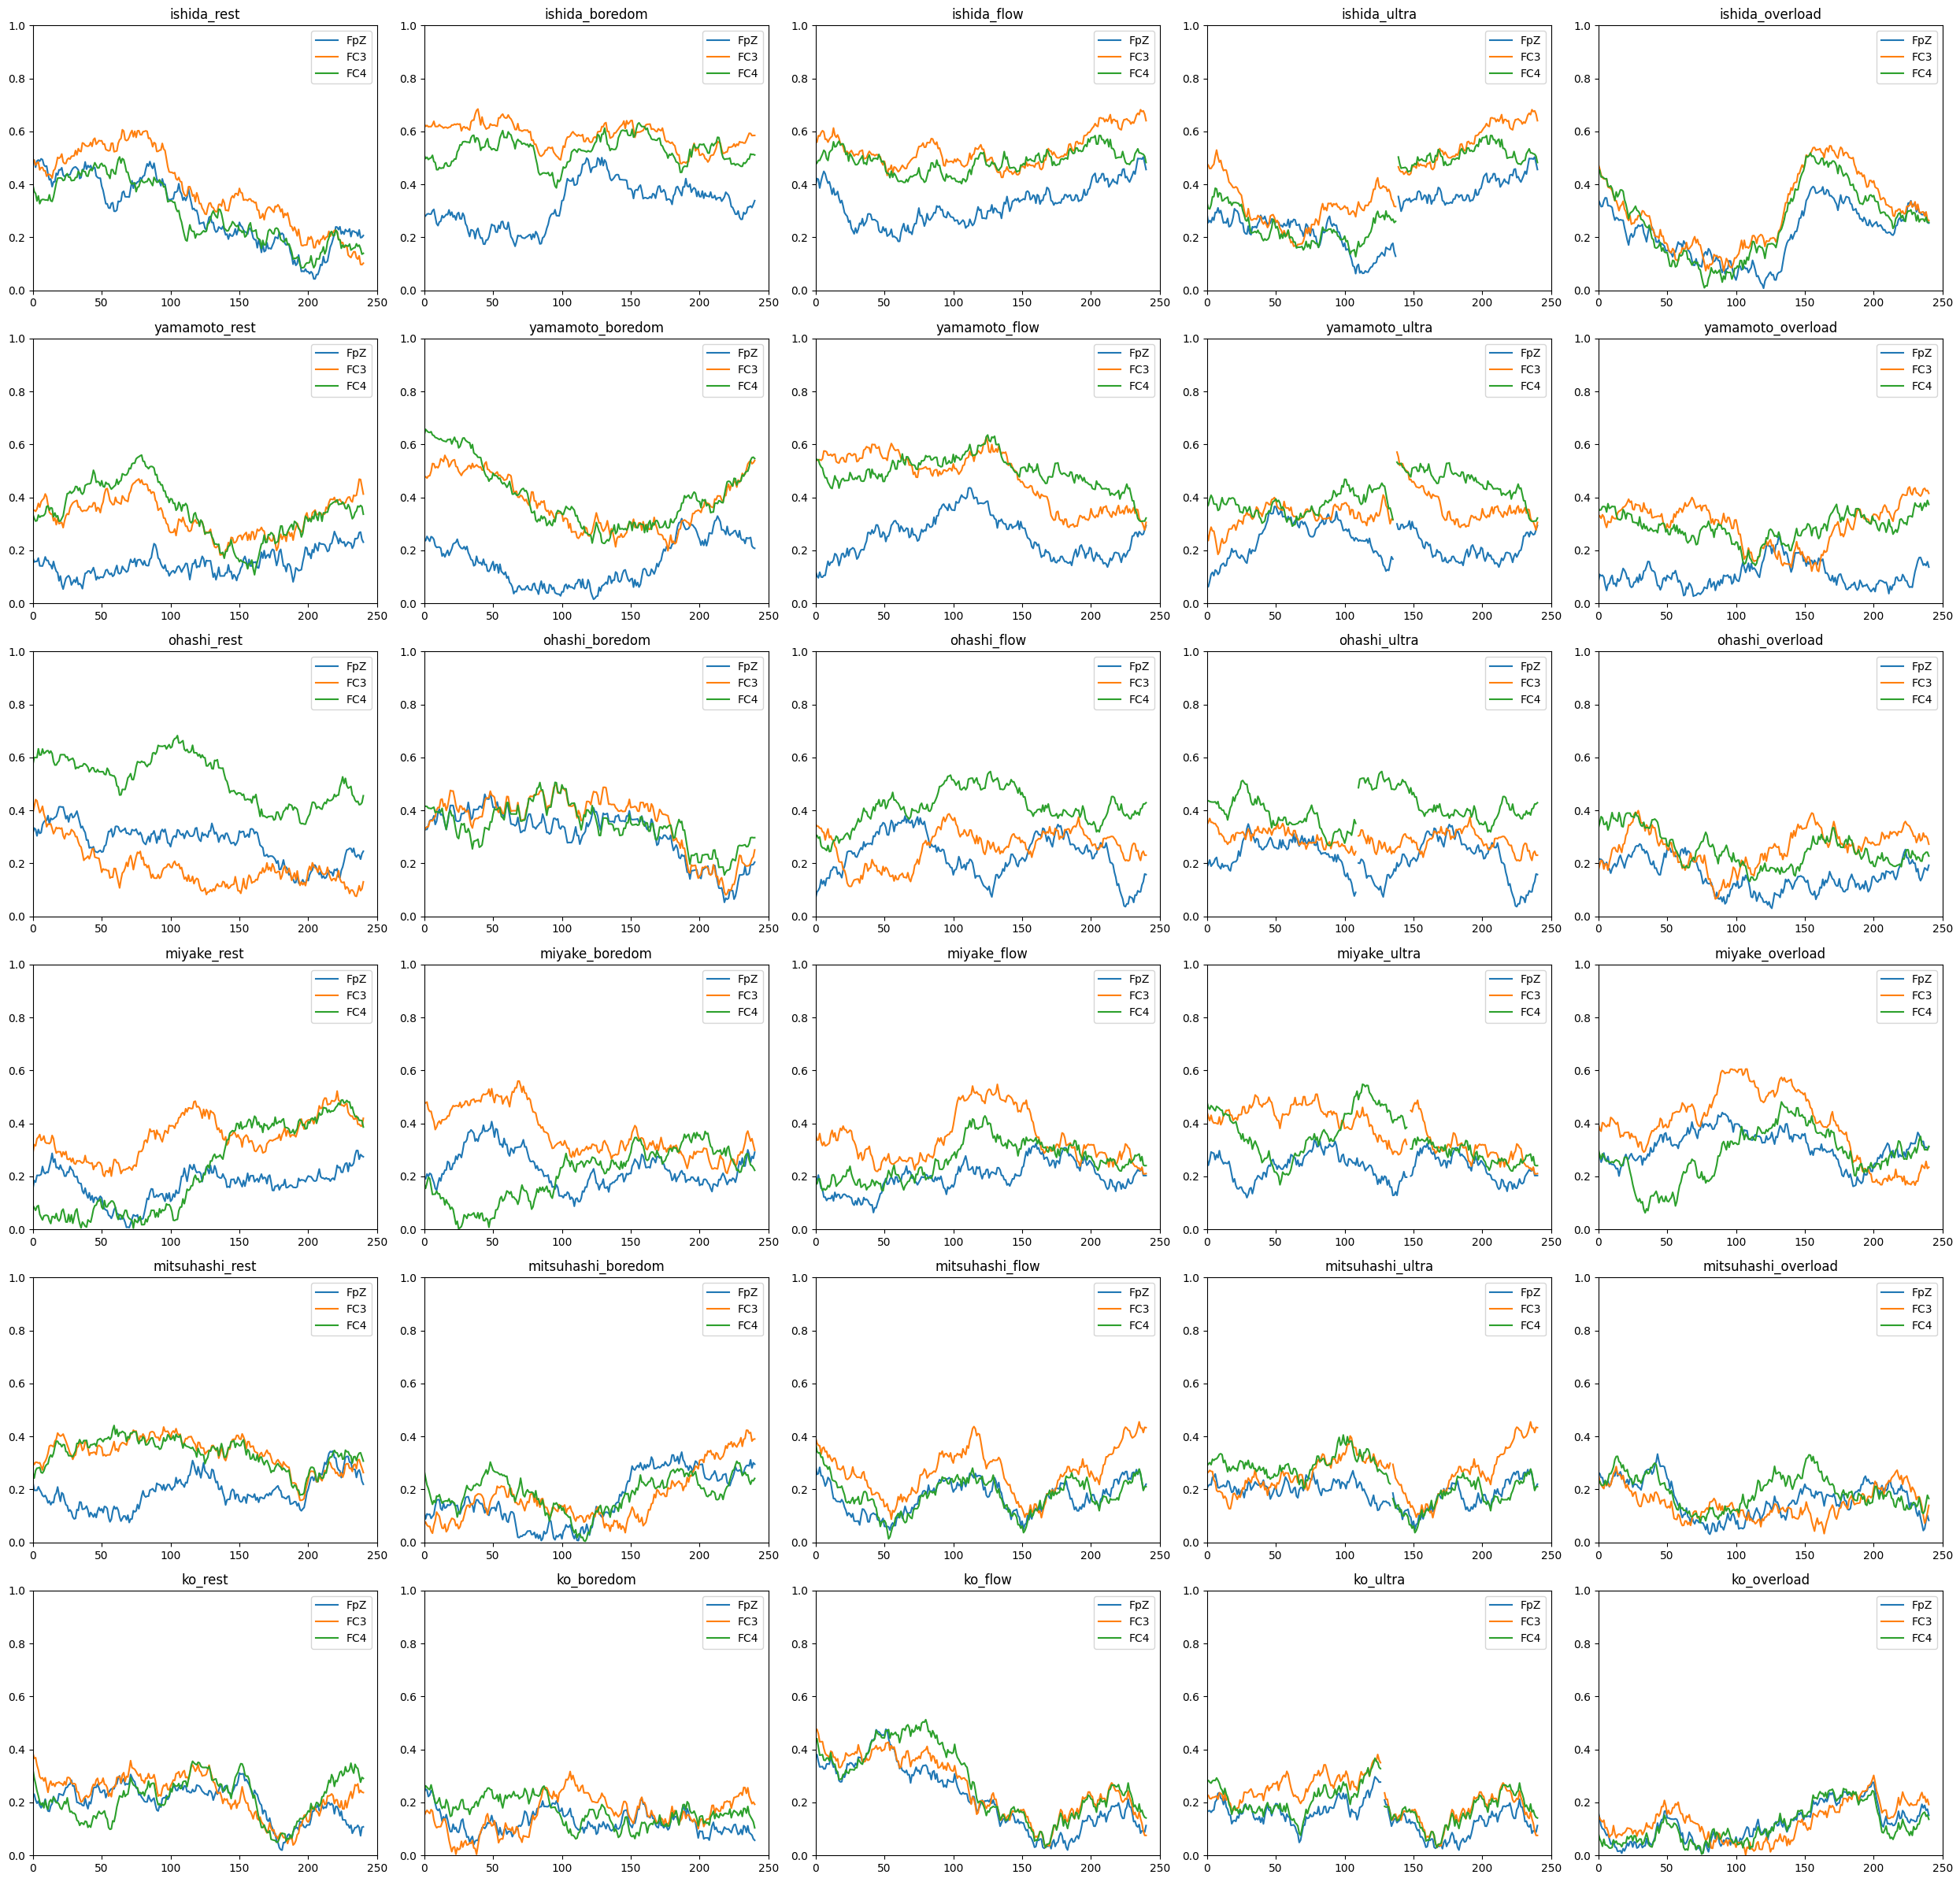

In [ ]:
import re # Import re module for robust name extraction

# Mapping for the numeric prefix in the filename and the actual phase name in the filename
phase_file_info = {
    "rest": {"prefix": "0", "filename_part": "rest"},
    "boredom": {"prefix": "2", "filename_part": "boredom"},
    "flow": {"prefix": "3", "filename_part": "flow"},
    "ultra": {"prefix": "4", "filename_part": "flow_ultra"}, # 'ultra' phase maps to 'flow_ultra' in filename
    "overload": {"prefix": "5", "filename_part": "overload"}
}

num_subjects = len(subject_name_list)
num_phases = len(phase_name_list)

# Adjust figsize dynamically for the new layout
fig = plt.figure(figsize=(num_phases * 5, num_subjects * 4))

plot_counter = 0
# Loop through subjects first to arrange them by row
for sub_idx, subject in enumerate(subject_name_list):
    # Then loop through phases for each subject to arrange them by column
    for phase_idx, phase_key in enumerate(phase_name_list):
        plot_counter += 1
        prefix = phase_file_info[phase_key]["prefix"]
        filename_phase = phase_file_info[phase_key]["filename_part"]

        # Construct the expected filename pattern
        expected_filename_pattern = f"PLI_{prefix}_{subject}_{filename_phase}.csv"

        # Find the path in the 'pathes' list
        current_path = None
        for p in pathes:
            if expected_filename_pattern in p:
                current_path = p
                break

        if current_path:
            df = pd.read_csv(current_path)
            # Subplot arrangement: (num_rows, num_columns, plot_index)
            plt.subplot(num_subjects, num_phases, plot_counter)
            plt.ylim(0,1)
            plt.xlim(0,250)

            # Plotting only FpZ, FC3, FC4 as requested
            columns_to_plot = ['FpZ', 'FC3', 'FC4']
            existing_columns = [col for col in columns_to_plot if col in df.columns]
            if existing_columns:
                plt.plot(df[existing_columns])
                plt.legend(existing_columns)
            else:
                plt.text(0.5, 0.5, "Selected columns not found", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

            # Set title using the subject name and the phase key
            plt.title(f"{subject}_{phase_key}")
        else:
            # If a file for a specific subject and phase is not found, plot an empty subplot with a message
            plt.subplot(num_subjects, num_phases, plot_counter)
            plt.text(0.5, 0.5, f"File not found: {subject}_{phase_key}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
            plt.title(f"{subject}_{phase_key} (Missing)")

plt.tight_layout() # Adjust layout to prevent titles from overlapping
plt.show()
